### Project-5

Domain : Object recognition

Description :
    1. Classify a given silhouette as one of three types of vehicles.
    2.  Four "Corgie" model vehicles were used for the experiment: 
        a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars.
    3.  This particular combination of vehicles was chosen with the expectation 
        that the bus, van and either one of the cars would be readily distinguishable, 
        but it would be more difficult to distinguish between the cars.

Objective:
    1. Applying dimensionality reduction technique - PCA and train a model using 
    principal components instead of training the model using raw data.

==========================================================================================

Importing necessary libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Libraries for data split for train & test and Supervised Learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC

In [3]:
# Packages for Score analysis 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [4]:
# Libraries to scale the dataset where there is unequal count of Target values
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [5]:
# Libraries for Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

# Pairwise distribution between data points
from scipy.spatial.distance import pdist

Load dataset into dataframe

In [6]:
veh_df = pd.read_csv('vehicle.csv')

Get top 5 records from dataframe

In [7]:
veh_df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [8]:
veh_df.shape

(846, 19)

In [9]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [10]:
veh_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846,NaN,NaN,NaN,93.6785,8.23447,73,87,93,100,119
circularity,841,NaN,NaN,NaN,44.8288,6.15217,33,40,44,49,59
distance_circularity,842,NaN,NaN,NaN,82.1105,15.7783,40,70,80,98,112
radius_ratio,840,NaN,NaN,NaN,168.888,33.5202,104,141,167,195,333
pr.axis_aspect_ratio,844,NaN,NaN,NaN,61.6789,7.89146,47,57,61,65,138
max.length_aspect_ratio,846,NaN,NaN,NaN,8.56738,4.60122,2,7,8,10,55
scatter_ratio,845,NaN,NaN,NaN,168.902,33.2148,112,147,157,198,265
elongatedness,845,NaN,NaN,NaN,40.9337,7.81619,26,33,43,46,61
pr.axis_rectangularity,843,NaN,NaN,NaN,20.5824,2.59293,17,19,20,23,29
max.length_rectangularity,846,NaN,NaN,NaN,147.999,14.5157,118,137,146,159,188


In [11]:
#for col in veh_df.columns:
    #print (veh_df[veh_df[col].isnull()])

In [12]:
null_counts = veh_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

skewness_about                 6
radius_ratio                   6
circularity                    5
scaled_radius_of_gyration.1    4
distance_circularity           4
scaled_variance                3
pr.axis_rectangularity         3
scaled_radius_of_gyration      2
scaled_variance.1              2
pr.axis_aspect_ratio           2
skewness_about.2               1
skewness_about.1               1
elongatedness                  1
scatter_ratio                  1
dtype: int64

In [13]:
veh_df.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [14]:
def check_unique_vals(col):
    uniq_val = list(veh_df[col].unique())
    return uniq_val

column_index=veh_df.describe(exclude=['int64','float64']).columns.tolist()
column_index

def disp_uniq_counts(x=''):
    if not x:
        for col in column_index:
            tmp_dict = dict()
            tmp_dict['Column'] = col.upper()
            val_list = veh_df[col].unique()
            for uVal in val_list:
                tmp_dict[uVal] = veh_df[veh_df[col] == uVal][col].count()
            result = pd.DataFrame(tmp_dict, index=[0])
            print(result, '\n')
            print("==========================================================")
    else :
        tmp_dict = dict()
        col = x
        tmp_dict['Column'] = col.upper()
        val_list = veh_df[col].unique()
        for uVal in val_list:
            tmp_dict[uVal] = veh_df[veh_df[col] == uVal][col].count()
        result = pd.DataFrame(tmp_dict, index=[0])
        print(result, '\n')
        print("==========================================================")

In [15]:
column_index

['class']

In [16]:
check_unique_vals('class')

['van', 'car', 'bus']

In [17]:
disp_uniq_counts()

  Column  van  car  bus
0  CLASS  199  429  218 



In [18]:
def set_lable_encoding(df, col_list):
    le = preprocessing.LabelEncoder()
    for col in col_list:
        df[col] = le.fit_transform(df[col])
        
    print (df.head())
    
set_lable_encoding(veh_df, column_index)

   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

In [19]:
check_unique_vals('class')

[2, 1, 0]

In [20]:
disp_uniq_counts()

  Column    2    1    0
0  CLASS  199  429  218 



In [21]:
#replacing the NAN values with median values 
veh_df.fillna(veh_df.median(), inplace=True)

In [22]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [23]:
veh_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [24]:
### Box Plot for checking Outliers

In [25]:
veh_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [26]:
def col_box_plot(col_name):
    sns.boxplot(veh_df[col_name])
    
    col_desc(col_name)
    
    detect_col_outlier(col_name)

In [27]:
def col_desc(col_name):
    col_df = pd.DataFrame({'Column':col_name, 
                           'Mean':veh_df[col_name].mean(), 
                           'Median':veh_df[col_name].median(), 
                           'Std. Deviation':veh_df[col_name].std(),
                           'Min. Value':veh_df[col_name].min(),
                           'Max. Value':veh_df[col_name].max()},index=[0])
    #print ("\n=============================")
    print (col_df)

In [28]:
def detect_col_outlier(col_name):
    q1, q3= np.percentile(veh_df[col_name],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    print ("\n=============================")
    print ('Lower Bound Value : ', lower_bound)
    print ('Upper Bound Value : ', upper_bound)
    
    #min_check = veh_df[veh_df[col_name] < lower_bound][col_name]
    #max_check = veh_df[veh_df[col_name] > upper_bound][col_name]
    
    #print (min_check)
    #print (max_check)
    #if min_check :
    #    print ("There is an lower limit outlier present in column : ", col_name)
        
    #if max_check :
    #    print ("There is an upper limit outlier present in column : ", col_name)

In [29]:
#def detecting_outliers(col_name):
#    outliers = veh_df[veh_df[col_name] > veh_df[col_name].mean() + 3 * veh_df[col_name].std()]
#    print (outliers)
    

        Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  compactness  93.678487    93.0        8.234474          73         119

Lower Bound Value :  67.5
Upper Bound Value :  119.5


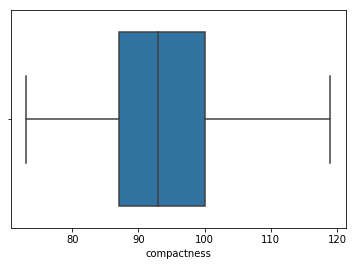

In [30]:
col_box_plot('compactness')

        Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  circularity  44.823877    44.0        6.134272        33.0        59.0

Lower Bound Value :  26.5
Upper Bound Value :  62.5


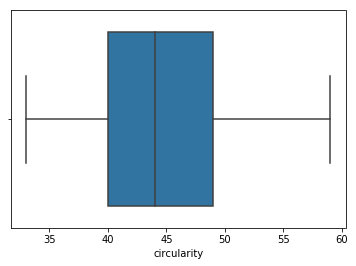

In [31]:
col_box_plot('circularity')

                 Column       Mean  Median  Std. Deviation  Min. Value  \
0  distance_circularity  82.100473    80.0       15.741569        40.0   

   Max. Value  
0       112.0  

Lower Bound Value :  28.0
Upper Bound Value :  140.0


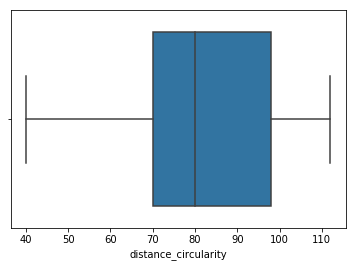

In [32]:
col_box_plot('distance_circularity')

In [33]:
veh_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

         Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  radius_ratio  168.874704   167.0       33.401356       104.0       333.0

Lower Bound Value :  60.0
Upper Bound Value :  276.0


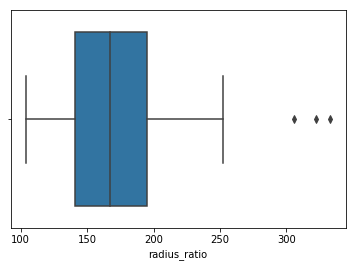

In [34]:
col_box_plot('radius_ratio')

                 Column       Mean  Median  Std. Deviation  Min. Value  \
0  pr.axis_aspect_ratio  61.677305    61.0        7.882188        47.0   

   Max. Value  
0       138.0  

Lower Bound Value :  45.0
Upper Bound Value :  77.0


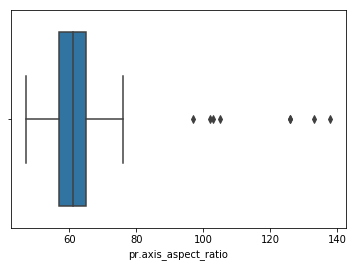

In [35]:
col_box_plot('pr.axis_aspect_ratio')

                    Column      Mean  Median  Std. Deviation  Min. Value  \
0  max.length_aspect_ratio  8.567376     8.0        4.601217           2   

   Max. Value  
0          55  

Lower Bound Value :  2.5
Upper Bound Value :  14.5


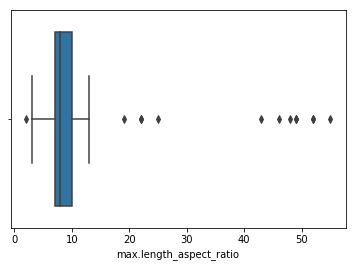

In [36]:
col_box_plot('max.length_aspect_ratio')

          Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  scatter_ratio  168.887707   157.0        33.19771       112.0       265.0

Lower Bound Value :  70.5
Upper Bound Value :  274.5


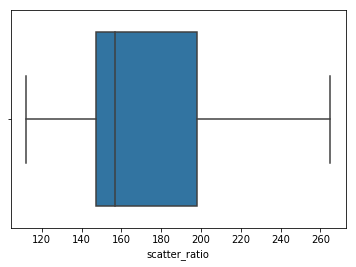

In [37]:
col_box_plot('scatter_ratio')

In [38]:
veh_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

          Column      Mean  Median  Std. Deviation  Min. Value  Max. Value
0  elongatedness  40.93617    43.0        7.811882        26.0        61.0

Lower Bound Value :  13.5
Upper Bound Value :  65.5


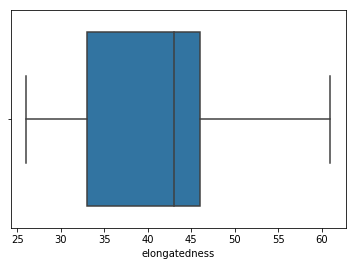

In [39]:
col_box_plot('elongatedness')

                   Column       Mean  Median  Std. Deviation  Min. Value  \
0  pr.axis_rectangularity  20.580378    20.0        2.588558        17.0   

   Max. Value  
0        29.0  

Lower Bound Value :  13.0
Upper Bound Value :  29.0


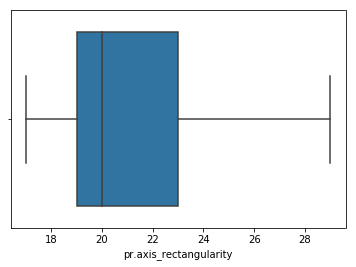

In [40]:
col_box_plot('pr.axis_rectangularity')

                      Column        Mean  Median  Std. Deviation  Min. Value  \
0  max.length_rectangularity  147.998818   146.0       14.515652         118   

   Max. Value  
0         188  

Lower Bound Value :  104.0
Upper Bound Value :  192.0


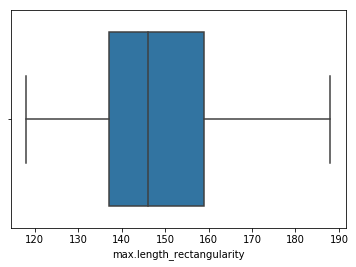

In [41]:
col_box_plot('max.length_rectangularity')

            Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  scaled_variance  188.596927   179.0       31.360427       130.0       320.0

Lower Bound Value :  92.0
Upper Bound Value :  292.0


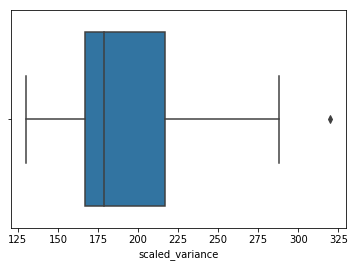

In [42]:
col_box_plot('scaled_variance')

              Column        Mean  Median  Std. Deviation  Min. Value  \
0  scaled_variance.1  439.314421   363.5      176.496341       184.0   

   Max. Value  
0      1018.0  

Lower Bound Value :  -84.5
Upper Bound Value :  989.5


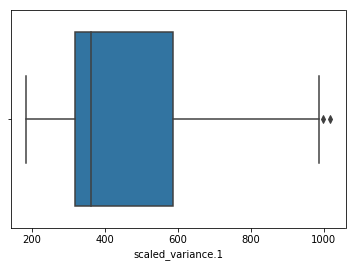

In [43]:
col_box_plot('scaled_variance.1')

                      Column        Mean  Median  Std. Deviation  Min. Value  \
0  scaled_radius_of_gyration  174.706856   173.5       32.546277       109.0   

   Max. Value  
0       268.0  

Lower Bound Value :  75.5
Upper Bound Value :  271.5


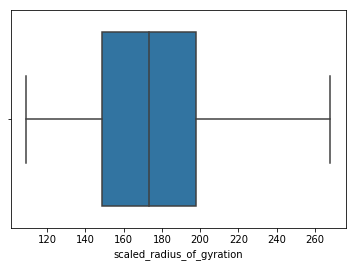

In [44]:
col_box_plot('scaled_radius_of_gyration')

                        Column       Mean  Median  Std. Deviation  Min. Value  \
0  scaled_radius_of_gyration.1  72.443262    71.5        7.468734        59.0   

   Max. Value  
0       135.0  

Lower Bound Value :  55.0
Upper Bound Value :  87.0


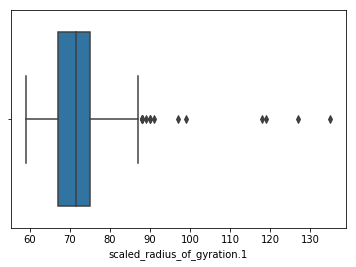

In [45]:
col_box_plot('scaled_radius_of_gyration.1')

In [46]:
veh_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

           Column      Mean  Median  Std. Deviation  Min. Value  Max. Value
0  skewness_about  6.361702     6.0        4.903244         0.0        22.0

Lower Bound Value :  -8.5
Upper Bound Value :  19.5


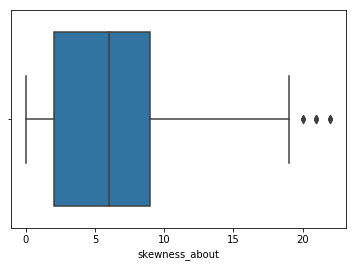

In [47]:
col_box_plot('skewness_about')

             Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  skewness_about.1  12.600473    11.0        8.930962         0.0        41.0

Lower Bound Value :  -16.0
Upper Bound Value :  40.0


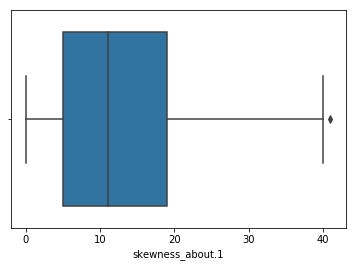

In [48]:
col_box_plot('skewness_about.1')

             Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  skewness_about.2  188.91844   188.0        6.152247       176.0       206.0

Lower Bound Value :  170.5
Upper Bound Value :  206.5


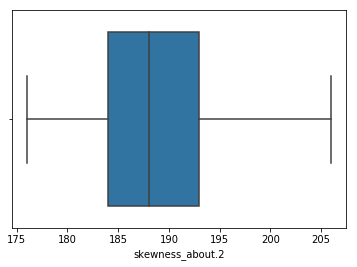

In [49]:
col_box_plot('skewness_about.2')

          Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  hollows_ratio  195.632388   197.0        7.438797         181         211

Lower Bound Value :  174.125
Upper Bound Value :  217.125


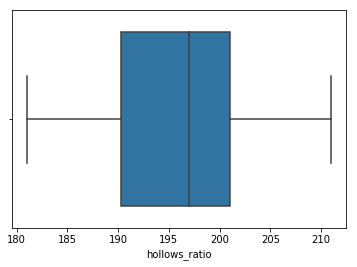

In [50]:
col_box_plot('hollows_ratio')

In [51]:
# ourtlier Analysis
# outliers seen for ther following 8 attributes :
#    1. Radius_ratio
#    2. pr.axis_aspect_ratio
#    3. max.length_aspect_ratio
#    4. scaled_variance
#    5. scaled_variance.1
#    6. scaled_radius_of_gyration.1
#    7. skewness_about
#    8. skewness_about.1

In [52]:
### Histogram plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237A8F83B38>,
      dtype=object)

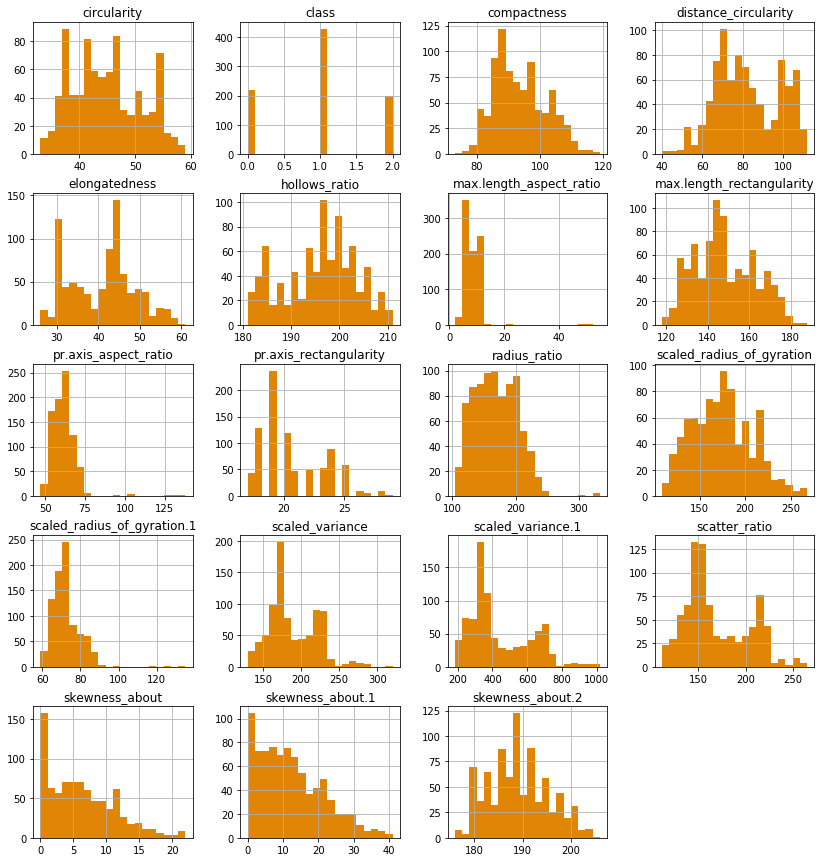

In [53]:
veh_df.hist(bins=20, figsize=(14,15), color='#E18506')

In [54]:
### Dist plot for skewness of features

In [55]:
def col_dist_n_skew(col_name):
    
    sns.distplot(veh_df[col_name])
    plt.show
    
    skew = veh_df[col_name].skew()
    if skew < 0 :
        print ("Skewness of {} indicates left or negatively skewed\n".format(skew))
    elif skew > 0 :
        print ("Skewness of {} indicates right or positively skewed\n".format(skew))
            
    col_desc(col_name)
    #print ("Skewness: %f" % veh_df[col_name].skew())

Skewness of 0.38127063263996497 indicates right or positively skewed

        Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  compactness  93.678487    93.0        8.234474          73         119


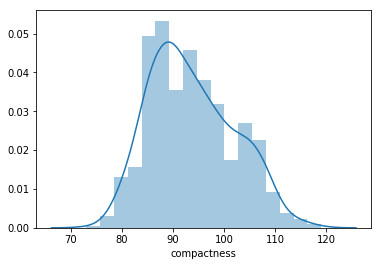

In [56]:
col_dist_n_skew('compactness')

Skewness of 0.2649279874901165 indicates right or positively skewed

        Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  circularity  44.823877    44.0        6.134272        33.0        59.0


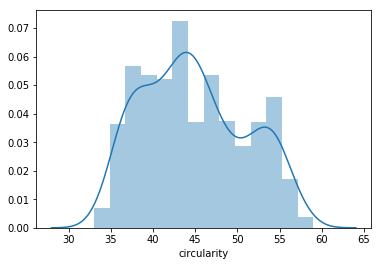

In [57]:
col_dist_n_skew('circularity')

Skewness of 0.10871801180935975 indicates right or positively skewed

                 Column       Mean  Median  Std. Deviation  Min. Value  \
0  distance_circularity  82.100473    80.0       15.741569        40.0   

   Max. Value  
0       112.0  


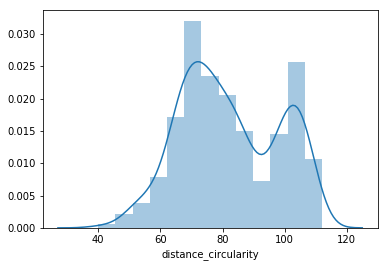

In [58]:
col_dist_n_skew('distance_circularity')
# it has binomial distribution

Skewness of 0.3975716412698015 indicates right or positively skewed

         Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  radius_ratio  168.874704   167.0       33.401356       104.0       333.0


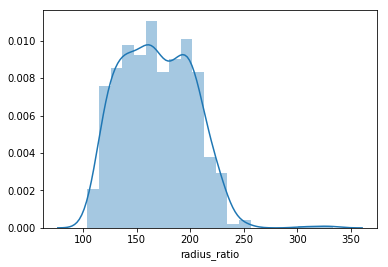

In [59]:
col_dist_n_skew('radius_ratio')
# This skewness indicates it has some outliers

Skewness of 3.8353916077858434 indicates right or positively skewed

                 Column       Mean  Median  Std. Deviation  Min. Value  \
0  pr.axis_aspect_ratio  61.677305    61.0        7.882188        47.0   

   Max. Value  
0       138.0  


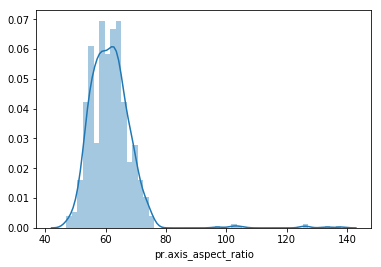

In [60]:
col_dist_n_skew('pr.axis_aspect_ratio')
# This skewness indicates it has more outliers

Skewness of 6.7783936191089476 indicates right or positively skewed

                    Column      Mean  Median  Std. Deviation  Min. Value  \
0  max.length_aspect_ratio  8.567376     8.0        4.601217           2   

   Max. Value  
0          55  


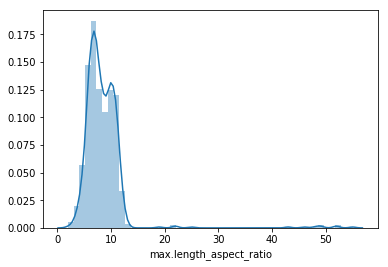

In [61]:
col_dist_n_skew('max.length_aspect_ratio')
# This skewness indicates it has more outliers

Skewness of 0.6087097328672928 indicates right or positively skewed

          Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  scatter_ratio  168.887707   157.0        33.19771       112.0       265.0


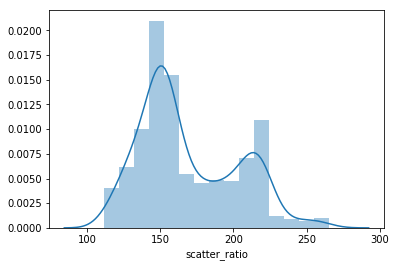

In [62]:
col_dist_n_skew('scatter_ratio')
# It has binomial distribution

Skewness of 0.046951051315584164 indicates right or positively skewed

          Column      Mean  Median  Std. Deviation  Min. Value  Max. Value
0  elongatedness  40.93617    43.0        7.811882        26.0        61.0


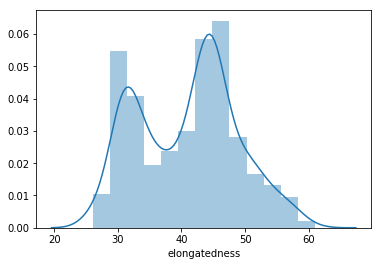

In [63]:
col_dist_n_skew('elongatedness')
# It has binomial distribution

Skewness of 0.7744056757899445 indicates right or positively skewed

                   Column       Mean  Median  Std. Deviation  Min. Value  \
0  pr.axis_rectangularity  20.580378    20.0        2.588558        17.0   

   Max. Value  
0        29.0  


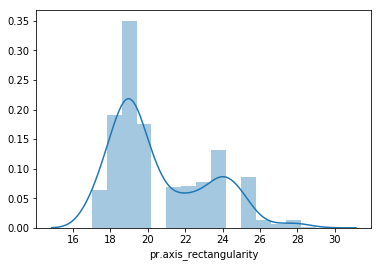

In [64]:
col_dist_n_skew('pr.axis_rectangularity')
# This skewness indicates it has some outliers and it has binomial distribution

Skewness of 0.2563591641353724 indicates right or positively skewed

                      Column        Mean  Median  Std. Deviation  Min. Value  \
0  max.length_rectangularity  147.998818   146.0       14.515652         118   

   Max. Value  
0         188  


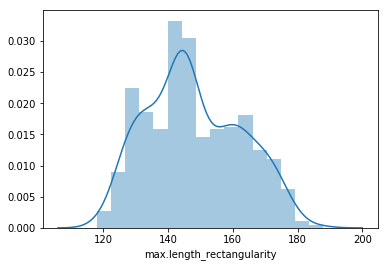

In [65]:
col_dist_n_skew('max.length_rectangularity')

Skewness of 0.6555976294220067 indicates right or positively skewed

            Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  scaled_variance  188.596927   179.0       31.360427       130.0       320.0


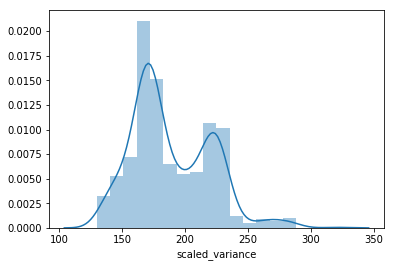

In [66]:
col_dist_n_skew('scaled_variance')
# This skewness indicates it has some outliers and it has binomial distribution

Skewness of 0.8453454281630146 indicates right or positively skewed

              Column        Mean  Median  Std. Deviation  Min. Value  \
0  scaled_variance.1  439.314421   363.5      176.496341       184.0   

   Max. Value  
0      1018.0  


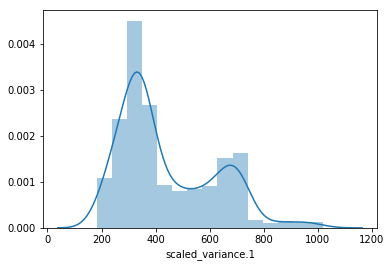

In [67]:
col_dist_n_skew('scaled_variance.1')
# This skewness indicates it has some outliers and it has binomial distribution

Skewness of 0.27990964799345835 indicates right or positively skewed

                      Column        Mean  Median  Std. Deviation  Min. Value  \
0  scaled_radius_of_gyration  174.706856   173.5       32.546277       109.0   

   Max. Value  
0       268.0  


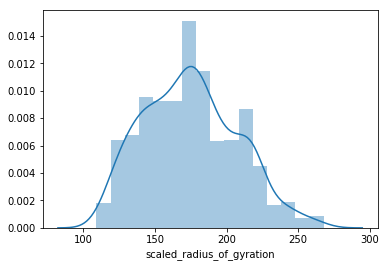

In [68]:
col_dist_n_skew('scaled_radius_of_gyration')

Skewness of 2.0899787533912066 indicates right or positively skewed

                        Column       Mean  Median  Std. Deviation  Min. Value  \
0  scaled_radius_of_gyration.1  72.443262    71.5        7.468734        59.0   

   Max. Value  
0       135.0  


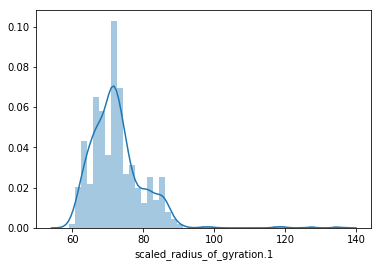

In [69]:
col_dist_n_skew('scaled_radius_of_gyration.1')
# This skewnes  indicates it has some more outliers

Skewness of 0.7808132397211246 indicates right or positively skewed

           Column      Mean  Median  Std. Deviation  Min. Value  Max. Value
0  skewness_about  6.361702     6.0        4.903244         0.0        22.0


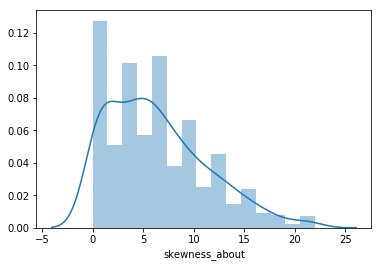

In [70]:
col_dist_n_skew('skewness_about')
# This skewness indicates it has some outliers

Skewness of 0.6890143067342678 indicates right or positively skewed

             Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  skewness_about.1  12.600473    11.0        8.930962         0.0        41.0


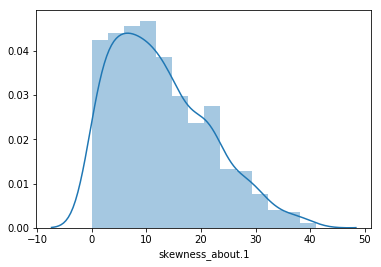

In [71]:
col_dist_n_skew('skewness_about.1')
# This skewness indicates it has some outliers

Skewness of 0.24998506992542593 indicates right or positively skewed

             Column       Mean  Median  Std. Deviation  Min. Value  Max. Value
0  skewness_about.2  188.91844   188.0        6.152247       176.0       206.0


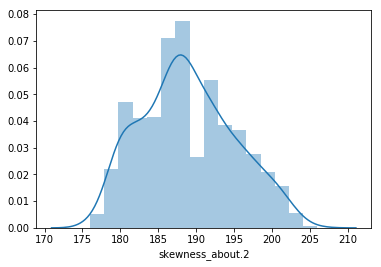

In [72]:
col_dist_n_skew('skewness_about.2')

Skewness of -0.22634128032982512 indicates left or negatively skewed

          Column        Mean  Median  Std. Deviation  Min. Value  Max. Value
0  hollows_ratio  195.632388   197.0        7.438797         181         211


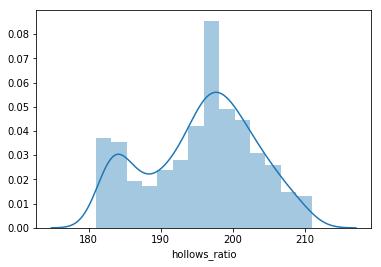

In [73]:
col_dist_n_skew('hollows_ratio')
# This feature also has binomial distribution

In [74]:
def treating_col_ouliers(col_name):
    q1=veh_df[col_name].quantile(.25)
    q3=veh_df[col_name].quantile(.75)
    iqr=q3 - q1
    low=q1 - 1.5 * iqr
    high= q3 + 1.5 * iqr

    veh_df.loc[(veh_df[col_name] < low) | (veh_df[col_name] > high), col_name] = veh_df[col_name].median()
    f, axes = plt.subplots( figsize=(15, 10), sharex=True)
    sns.boxplot(veh_df[col_name])
    print ("\n")

In [75]:
selected_attributes = ['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1']

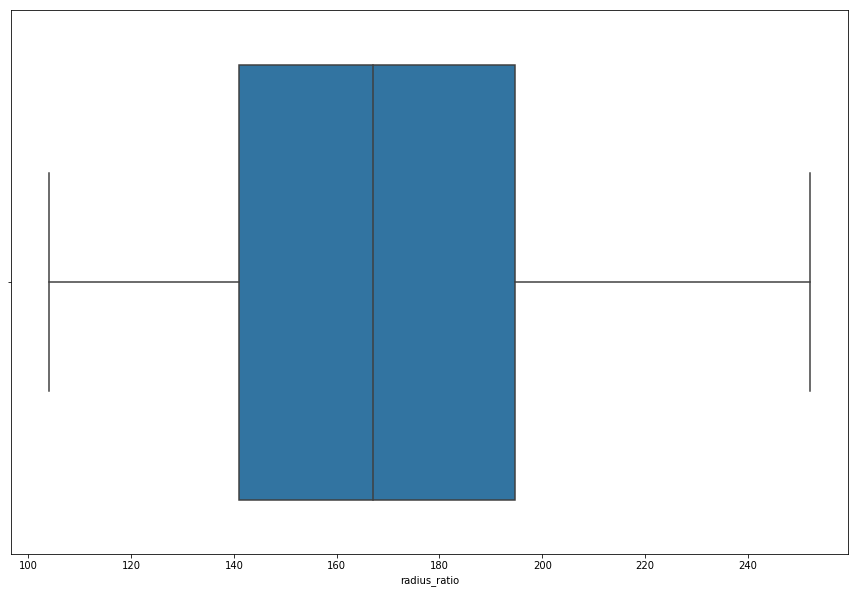

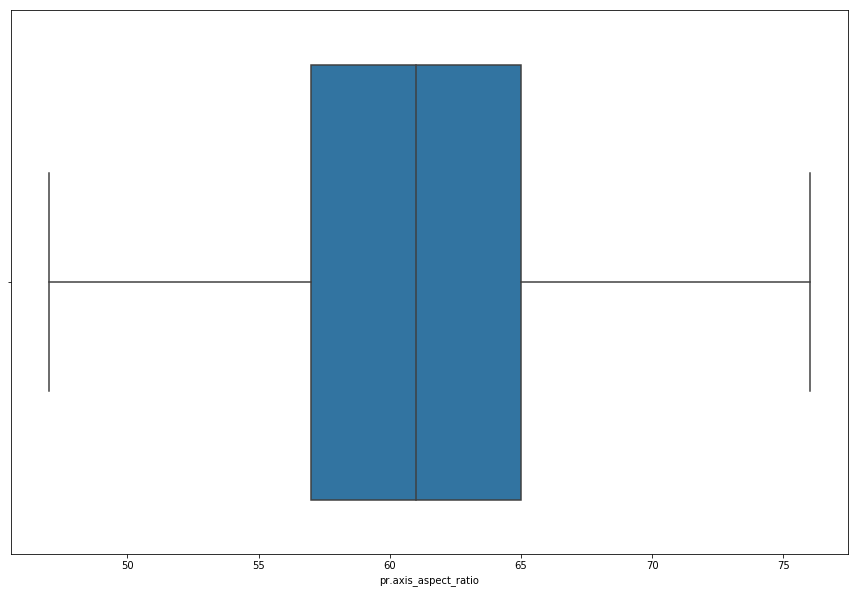

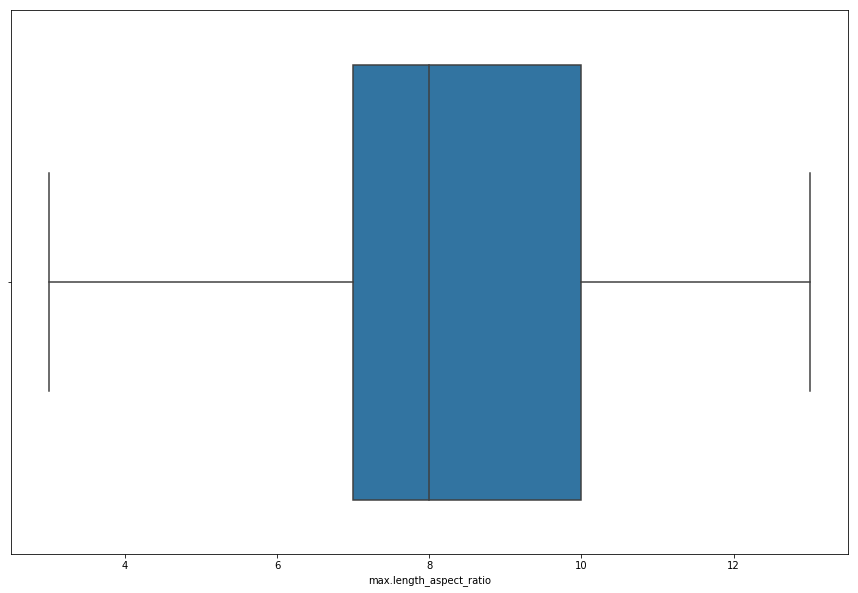

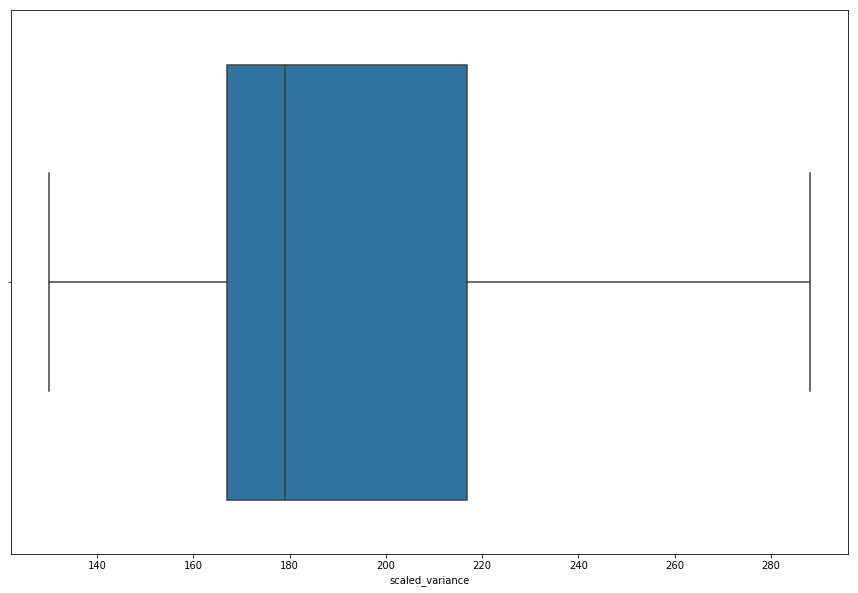

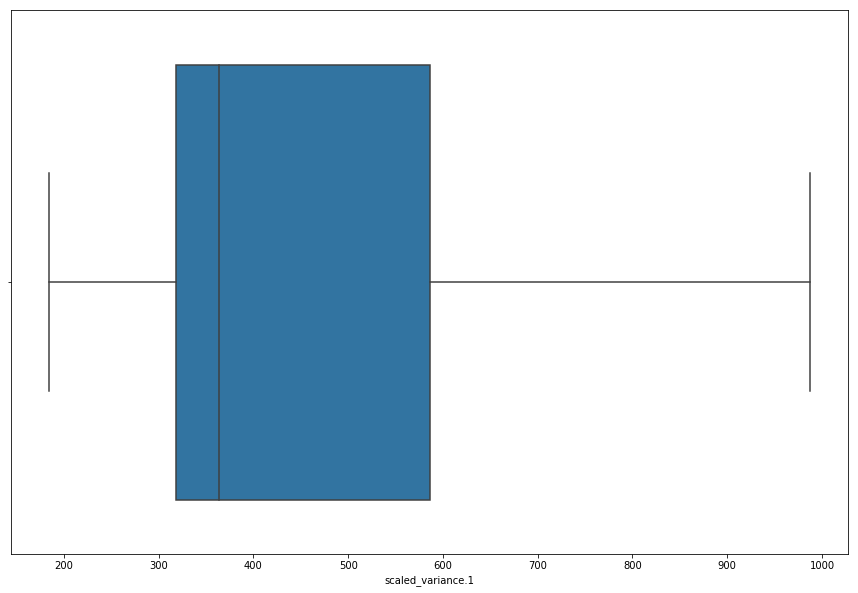

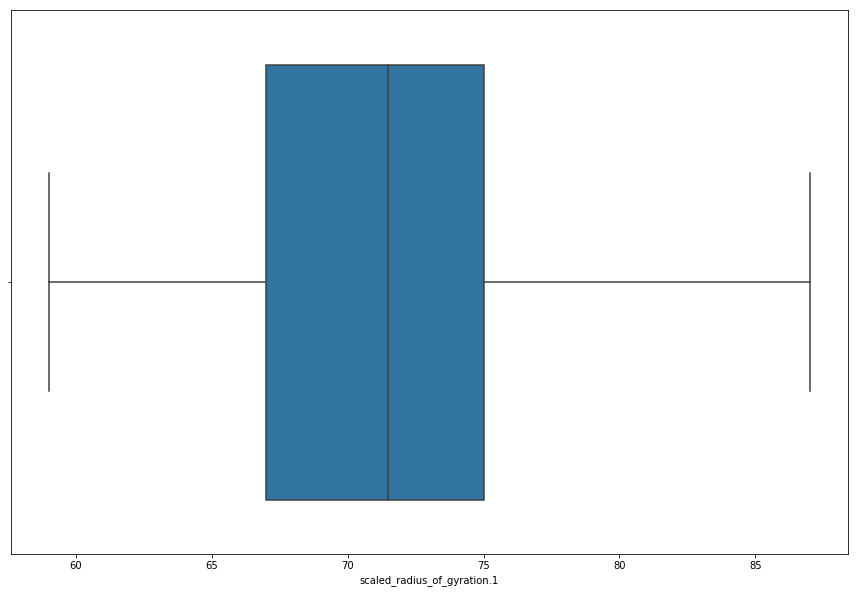

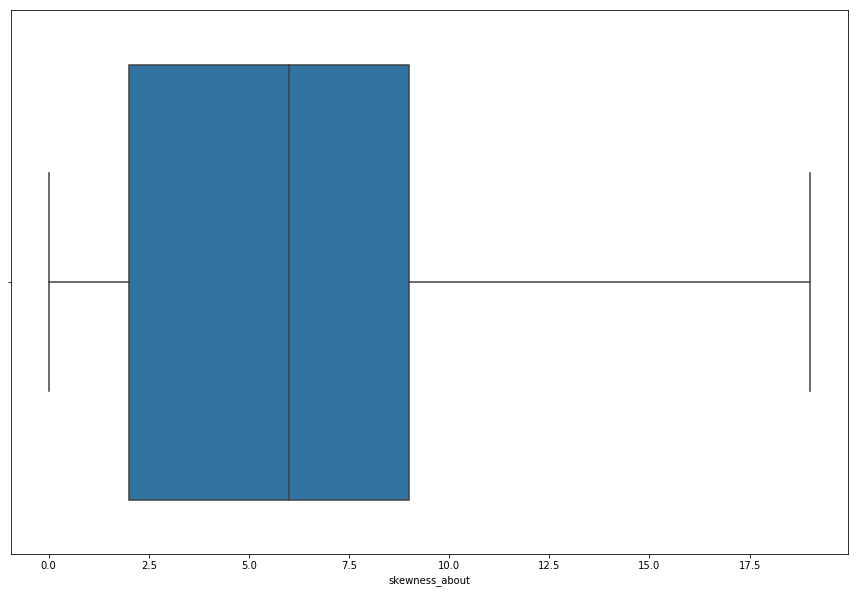

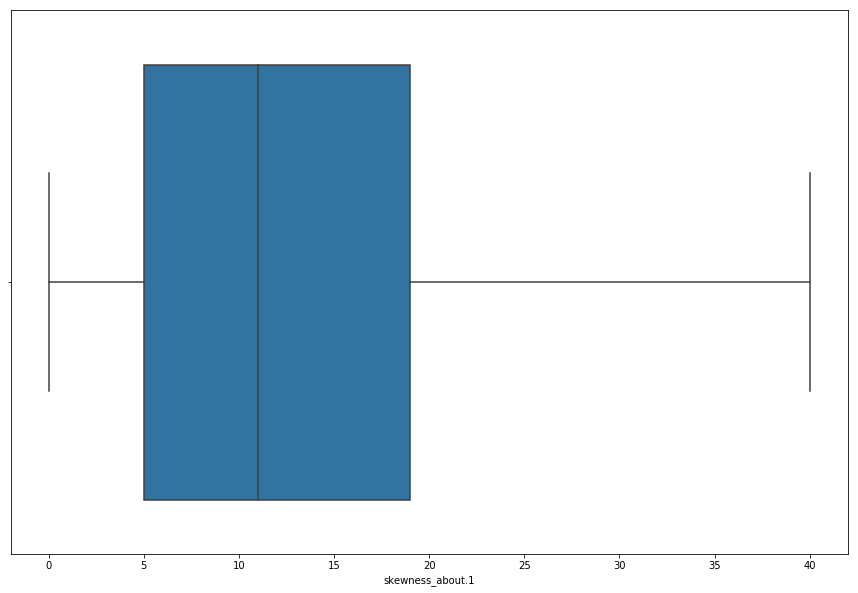

In [76]:
for col in selected_attributes:
    treating_col_ouliers(col)

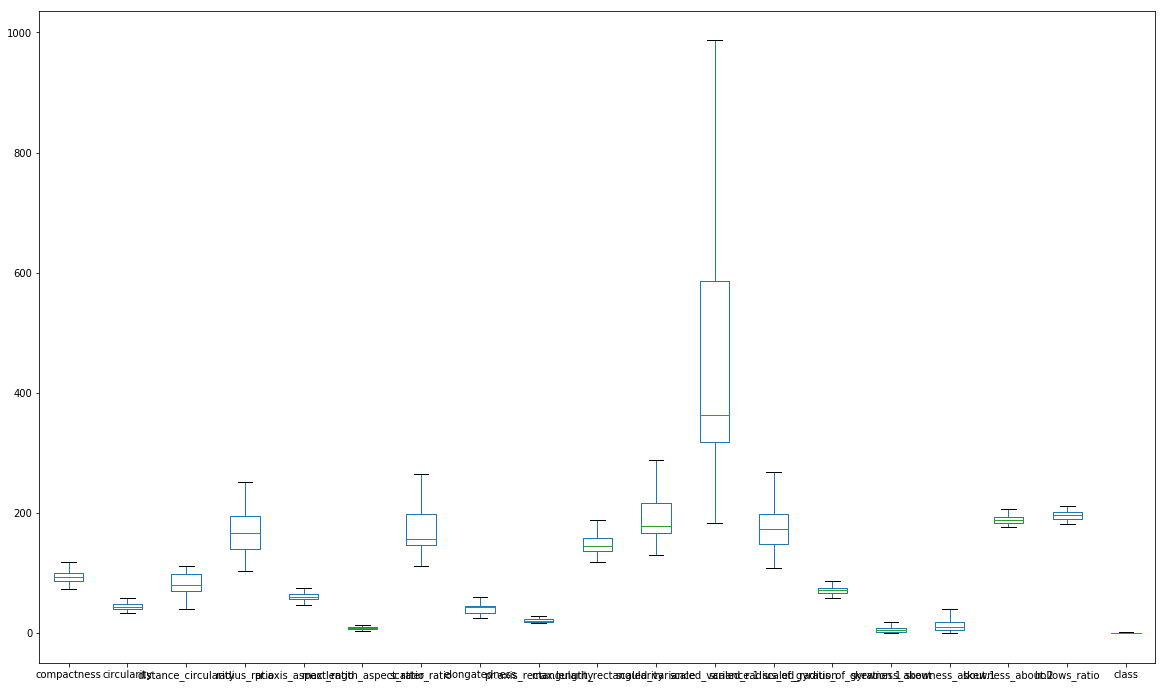

In [77]:
# Box plot after removal of outlier - There are no outliers now 
veh_df.plot(kind='box', figsize=(20,12))

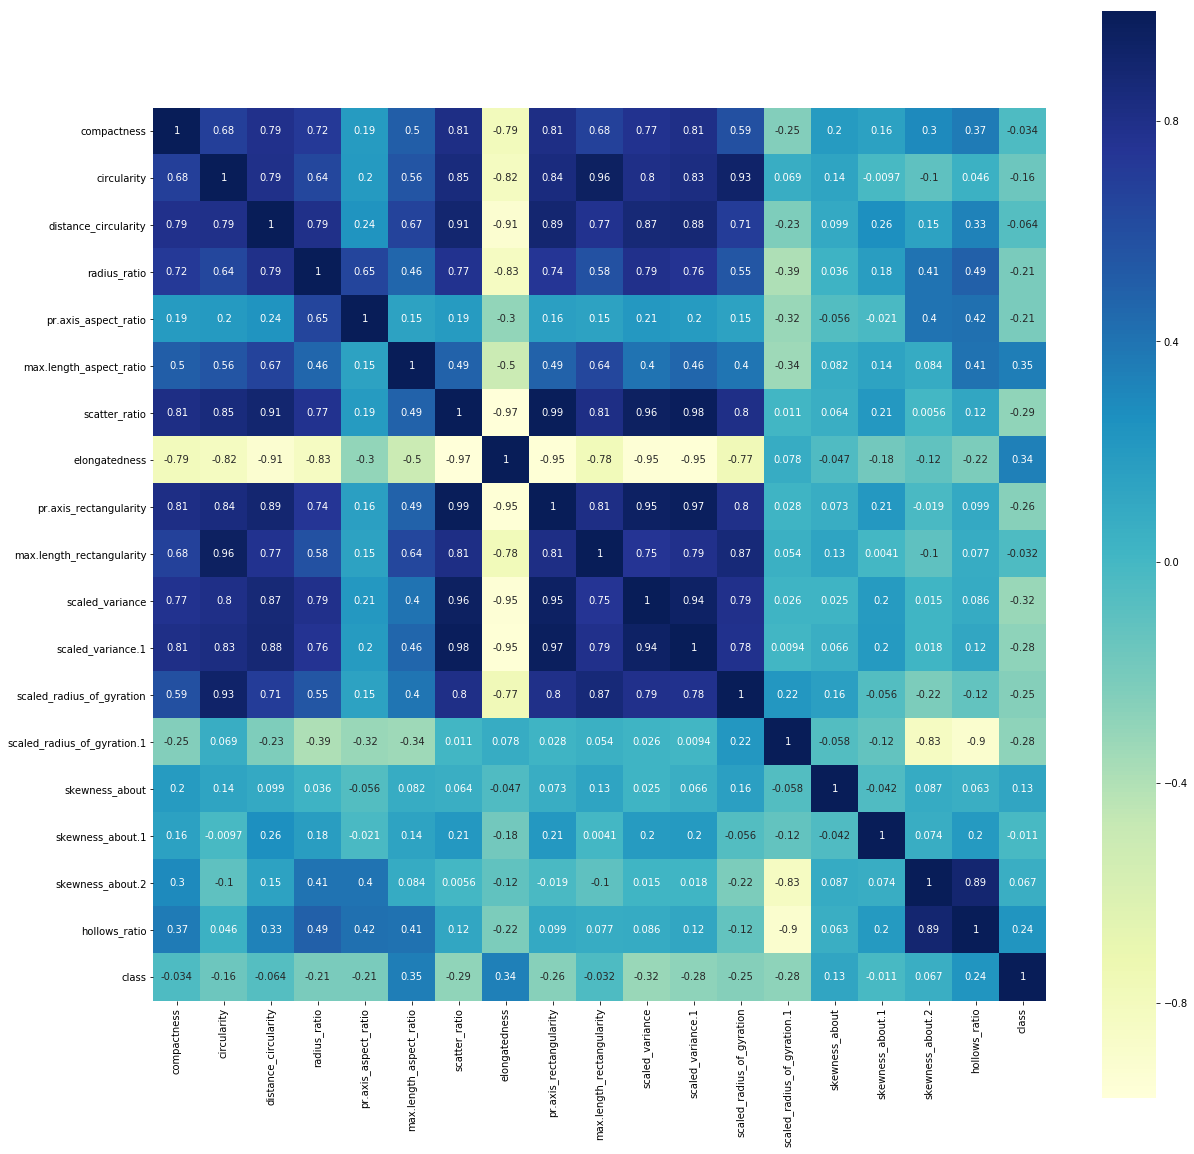

In [78]:
# Heat Map for various attributes 
corrmat = veh_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, vmax=1.0,cmap="YlGnBu",annot=True,square=True);

In [79]:
veh_df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.806170,0.585243,-0.246681,0.197308,0.156348,0.298537,0.365552,-0.033796
circularity,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.827462,0.925816,0.068745,0.136351,-0.009666,-0.104426,0.046351,-0.158910
distance_circularity,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.883943,0.705771,-0.229353,0.099107,0.262345,0.146098,0.332732,-0.064467
radius_ratio,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.760257,0.550774,-0.390459,0.035755,0.179601,0.405849,0.491758,-0.213948
pr.axis_aspect_ratio,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.196401,0.148591,-0.321070,-0.056030,-0.021088,0.400882,0.415734,-0.209298
max.length_aspect_ratio,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.463249,0.397397,-0.335444,0.081898,0.141664,0.083794,0.413174,0.352958
scatter_ratio,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.980447,0.799875,0.011314,0.064242,0.211647,0.005628,0.118817,-0.288895
elongatedness,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.948851,-0.766314,0.078391,-0.046943,-0.183642,-0.115126,-0.216905,0.339344
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.973606,0.796690,0.027545,0.073127,0.213801,-0.018649,0.099286,-0.258481
max.length_rectangularity,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.789632,0.866450,0.053856,0.130702,0.004129,-0.103948,0.076770,-0.032399


In [80]:
### Scale and use the data for learning
vehicle_scaled = veh_df.apply(zscore)

covariance_matrix= np.cov(vehicle_scaled.T)
print ('Covariance Matrix \n',covariance_matrix)

Covariance Matrix 
 [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446
  -0.03383559]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562
  -0.15909793]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625
  -0.06454368]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013
  -0.21420163]
 [ 0.1930925   0.20349327  0.2446

In [81]:
y=vehicle_scaled.iloc[:,18]
X=vehicle_scaled.iloc[:,0:17]

test_size=0.30
random=7

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=test_size,random_state=random)

In [82]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
covariance_matrix = np.cov(X_std.T)

print ("Covariance Matrix : \n", covariance_matrix)

Covariance Matrix : 
 [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484 -0.29849719  0.16323988  0.14776643  0.20734569

In [83]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print ("Eigen Values : \n", eigenvalues)
print ("\n Eigen Vectors : \n", eigenvectors)

Eigen Values : 
 [9.68818409e+00 2.50853095e+00 1.18996566e+00 1.11825019e+00
 8.67769097e-01 6.62796942e-01 3.06377969e-01 2.28167095e-01
 1.20065375e-01 7.85626509e-02 7.28459767e-02 6.36036675e-02
 5.16368287e-03 1.98314947e-02 2.37936454e-02 3.53598447e-02
 3.08500097e-02]

 Eigen Vectors : 
 [[-2.71510242e-01 -1.17131439e-01 -3.18419826e-02 -1.63512112e-01
  -1.16048573e-01 -2.73217111e-01  1.72627530e-01 -7.59553588e-01
  -3.76186569e-01  1.22270847e-01 -9.03655968e-02 -1.91354704e-02
   1.85081856e-02 -4.77859854e-02 -8.18314344e-02 -1.24914215e-01
  -7.13546257e-03]
 [-2.90339898e-01  1.43105117e-01 -1.97363198e-01  3.96127332e-02
   1.28445493e-01  7.48413267e-02 -3.97108983e-01 -6.96918875e-02
  -7.58794735e-03 -1.59852020e-01  4.39812681e-02 -1.57370539e-01
   4.86264704e-02  6.68386982e-01 -2.16515913e-01 -1.42485010e-01
  -3.18517506e-01]
 [-3.02225710e-01 -6.92368977e-02  7.08357951e-02 -1.09122551e-01
   9.98236777e-02  4.50698576e-03  1.46068960e-01  2.77452218e-01
  -8

In [84]:
### Makie set of (eigenvalue , eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

eig_pairs.sort()

eig_pairs.reverse()

print (eig_pairs)

### Extract the descending order eigenvalues and eigenvectors
eigenvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print ("Eigen values in descending order : \n", eigenvalues_sort)

[(9.688184090643965, array([-0.27151024, -0.2903399 , -0.30222571, -0.26701931, -0.09384916,
       -0.19294369, -0.31290222,  0.31019733, -0.30986773, -0.28084177,
       -0.30232471, -0.30783608, -0.26792985,  0.03188764, -0.03578375,
       -0.05706736, -0.02804184])), (2.5085309490694607, array([-0.11713144,  0.14310512, -0.0692369 , -0.26775463, -0.34054433,
       -0.10771547,  0.06220049,  0.01141741,  0.07799432,  0.14087162,
        0.05812322,  0.0574642 ,  0.23036705,  0.57240434, -0.01178329,
       -0.1120308 , -0.57595895])), (1.1899656616196341, array([-0.03184198, -0.1973632 ,  0.0708358 ,  0.01989216, -0.13379007,
       -0.11955647,  0.10949029, -0.08246354,  0.10950596, -0.20091809,
        0.13741074,  0.10968996, -0.20211653,  0.08050923, -0.52344449,
        0.70132928, -0.08470888])), (1.118250191604095, array([-0.16351211,  0.03961273, -0.10912255,  0.22131109,  0.56064522,
       -0.27599898,  0.00491047, -0.06716083, -0.01907892, -0.03498954,
        0.0737945

In [85]:
tot = sum(eigenvalues)

var_explained = [ (i / tot) for i in sorted(eigenvalues, reverse=True)]

## An array of cummulative variance
cumm_variance = np.cumsum(var_explained)

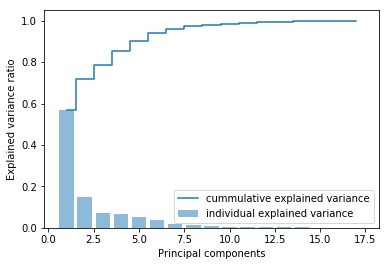

In [86]:
### PCA for dimension reduction and elbow plot to find out reduced number of dimension.
### which covers more than 95% of the variance

plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18), cumm_variance, where='mid', label='cummulative explained variance' )
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

In [87]:
# Based on the graph we select 8 attributes 
# because after this the other parameter will not have significant impact

In [88]:
## P_reduce represents reduced mathematical space

#### Reducing from 18 to 8 dimension space
P_reduce = np.array(eigenvectors_sort[0:8])

#### Projecting original data into principal component dimensions
X_std_4D = np.dot(X_std, P_reduce.T)

#### COnverting array to dataframe for pairplot
Proj_data_df = pd.DataFrame(X_std_4D)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df, y, test_size=test_size, random_state=random)

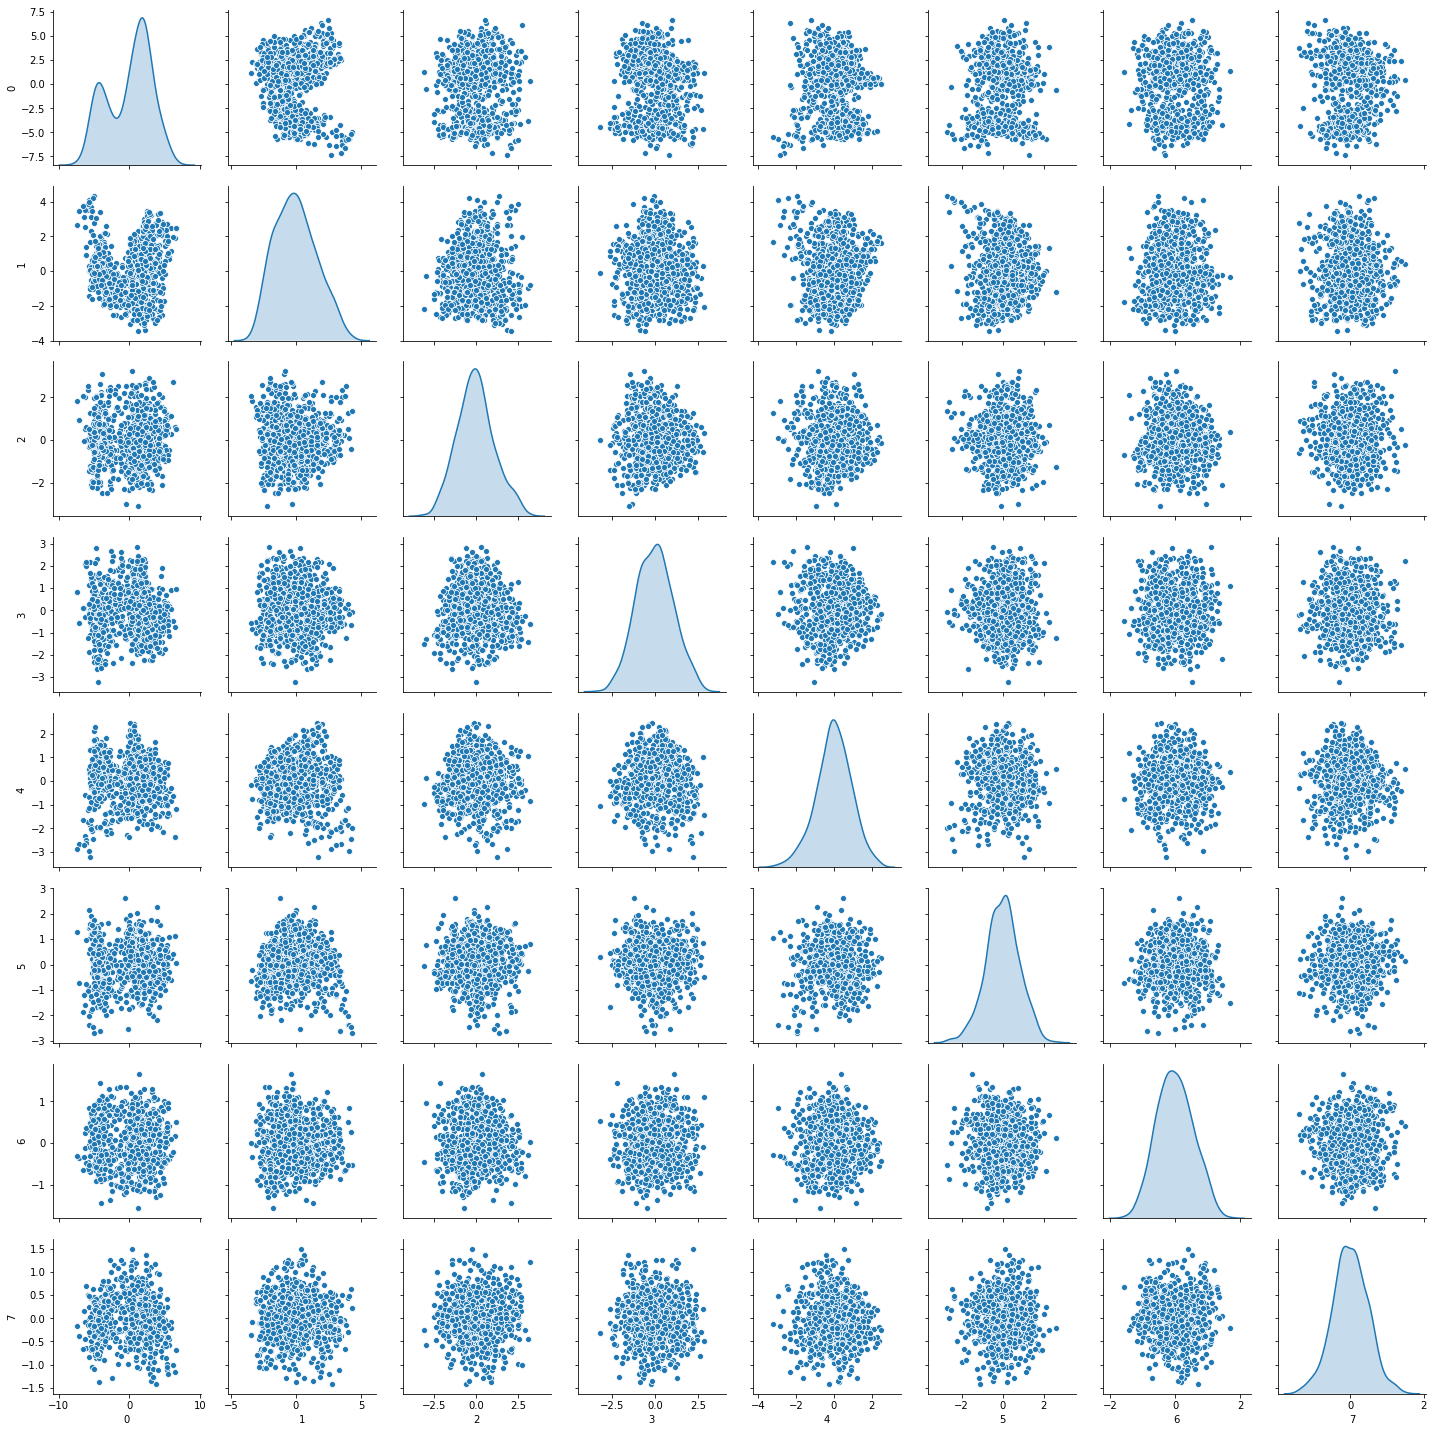

In [90]:
sns.pairplot(Proj_data_df, diag_kind='kde')

In [91]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [92]:
## Using Support vector machines to classify the class(y) of vehicles
## find the difference of accuracy with and without PCA on predictors(X)

y = np.asarray(vehicle_scaled.iloc[:,18], dtype="|S6")

svm_model = SVC()
without_PCA_svc = cross_val_score(svm_model, X, y, cv=10)

print (without_PCA_svc)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

[0.91764706 0.96470588 0.96470588 0.96470588 0.98823529 0.97647059
 0.92941176 0.96470588 0.96428571 0.96341463]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [93]:
without_PCA_svc_mean = without_PCA_svc.mean()

print (without_PCA_svc_mean)

0.9598288583726171


In [94]:
with_PCA_SVC =cross_val_score(svm_model, Proj_data_df, y, cv=10)

print(with_PCA_SVC)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

[0.91764706 0.95294118 0.92941176 0.94117647 0.96470588 0.97647059
 0.89411765 0.97647059 0.95238095 0.95121951]


In [95]:
with_PCA_SVC_mean = with_PCA_SVC.mean()

print (with_PCA_SVC_mean)

0.9456541641046663


In [96]:
result_df = pd.DataFrame({'SVM':['Scaled Features/Without PCA',' With PCA'],
                       'Mean Score':[ without_PCA_svc_mean,with_PCA_SVC_mean ]})
result_df

,SVM,Mean Score
0,Scaled Features/Without PCA,0.959829
1,With PCA,0.945654


In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
params ={'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf']}

GS_model = GridSearchCV(svm_model,param_grid=params,verbose=5)
y_train = np.asarray(y_train, dtype="|S6")
GS_model.fit(X_train,y_train)

print("Hyper Parameters with best parameter :\n",GS_model.best_params_)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8181818181818182, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8080808080808081, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8469387755102041, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ....... C=0.01, kernel=rbf, score=0.51010101010101, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ....... C=0.01, kernel=rbf, score=0.51010101010101, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5102040816326531, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, k

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.8333333333333334, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.8367346938775511, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.7626262626262627, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ...... C=0.1, kernel=rbf, score=0.8080808080808081, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.7755102040816326, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] .... C=0.5, kernel=linear, score=0.898989898989899, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8080808080808081, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8418367346938775, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.9191919191919192, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.9141414141414141, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ...... C=0.5, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8838383838383839, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8131313131313131, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8316326530612245, total=   0.0s
[CV] C=1, kernel=rbf .................................................


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ........ C=1, kernel=rbf, score=0.9242424242424242, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9141414141414141, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9387755102040817, total=   0.0s
Hyper Parameters with best parameter :
 {'C': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.4s finished
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [99]:
## Based on the Hyper Paramter result with bect result

SVM_model = SVC(C=1,kernel="rbf")
with_PCA_svc_new =cross_val_score(SVM_model, Proj_data_df, y, cv=10)
print(with_PCA_svc_new) 

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

[0.91764706 0.95294118 0.92941176 0.94117647 0.96470588 0.97647059
 0.89411765 0.97647059 0.95238095 0.95121951]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [100]:
with_PCA_svc_new_mean = with_PCA_svc_new.mean()

print (with_PCA_svc_new_mean)

0.9456541641046663


### Conclusion: